# Linear Regression using Least Squares

By Laxman Singh Tomar

In this tutorial, I'll analyze and cover the workflow of Linear Regression. We'll first get ourselves comfortable with Least Squares and later using the same set of ideas we'll implement Linear Regression using the same approach.

---

# 1. Introduction of Tutorial

# 1.1 Tutorial Objective

To understand the underlying maths and intricacies behind Linear Regresssion with Least Squares; and to cement the concepts in my head my implementing them from scratch.

## 1.2 Importing Libraries

In [1]:
 # For data analysis
import numpy as np
import pandas as pd

# For data visualization
import matplotlib.pyplot as plt

# Magic functions from Jupyter
# For inline plot
%matplotlib inline

#For printing versions
%reload_ext watermark

# For  making the notebook reload external python modules
%reload_ext autoreload
%autoreload 2

# For enabling retina(high resolution) plots
%config InlineBackend.figure_format = 'retina'

%watermark -p sklearn
%watermark -v -m --iversions


sklearn 0.21.2
numpy      1.16.4
pandas     0.24.2
matplotlib 3.1.0
CPython 3.7.3
IPython 7.6.1

compiler   : MSC v.1915 64 bit (AMD64)
system     : Windows
release    : 10
machine    : AMD64
processor  : Intel64 Family 6 Model 142 Stepping 10, GenuineIntel
CPU cores  : 8
interpreter: 64bit


---

# 2. Context

For supervised learning problems like Linear Regression, the way it works is when given some set of numeric input variables, we wish to predict another set of numbers. For instance, given the number of bedrooms and the size of the house, we wish to predict the price in which the house will be sold. So, what we wanna know, is how much do "variables" such as the number of bedrooms or the size of the house affects the house's price. One easy approach is to calculate these "variables" by Gradient Descent. Another one is ordinary least squares. Here our prime focus is on the former only.

## 2.1 Linear Regression Model

Linear regression is a linear model, e.g. a model that assumes a linear relationship between the input variables $(x)$ and the single output variable $(y)$. More speciﬁcally, that y can be calculated from a linear combination of the input variables $(x)$. When there is a single input variable $(x)$, the method is referred to as simple linear regression. When there are multiple input variables, literature from statistics often refers to the method as multiple linear regression. 

We will define a linear relationship between these two variables as follows:

$$y = mX + c$$ 

where $m$ is the slope and $c$ is the intercept or the bias term. Here we have only one input i.e. $x$. As you can recall the equation given is of a line. When we have multiple inputs the line is called hyperplane. Complexity of regression model is defined by the variables used in the model. When a coefficient becomes zero, it's influence on the input variable is nullified. Hence, when we aim to reduce the complexity of regression model what we mean is to making some coefficients zero. This is effectively what we call as Regularization.

Our goal is to determine the value of coefficients $m$ and $c$ such that the line corresponding to those values, returns the minimum error.

## 2.2 Loss Function

Loss is nothing but the error we get back when we plug in our predicted values of m and c. Our goal is to minimize this error in order to obtain as accurate as possible values of $m$ and $c$. For this, we'll make use of the Quadratic or Squared Error Function to calculate the loss. There are three steps in this function:

1. Find the difference between the actual $y$ and predicted $y$ value for a given $x$ in equation $y = mx + c$.


2. Square the difference for every value in $x$.

$$L(x) = \sum_{i=0}^{n}(y_i - \bar{y_i})^2$$

Here $y_i$ is the actual value and $\bar{y_i}$ is the predicted value. Substituting the value of $\bar{y_i}$:

$$L(x) = \sum_{i=0}^{n}(y_i-(mx_i+c))^2$$

We are squaring it as for the points lying below the regression line $(y_i - (mx_i+c))$ will be negative and we don't want negative values in out total error. Now, that we've defined the loss function, let's see how can we go about minimizing $m$ and $c$.

## 2.3 Least Squares

Now, that we've determined the loss function, the only thing left to do is to minimize it. This is done by taking the derivative of $L$, equating it to 0 and then finding an expression for $m$ and $c$. Once, we're done with the math we're left with following equations:

$$m = \frac{\sum_{i=1}^n (x_i - \bar x)(yi - \bar y)}{\sum_{i=1}^{n} (x_i - \bar x)^2}$$

$$c = \bar{y}-m\bar{x}$$

Here $\bar {x}$ is the mean of all the values in the input $X$ and $\bar {y}$ is the mean of all the values in the desired output $Y$. This is the Least Squares method. Now we will implement this in python and make predictions.

---

# 3. Code

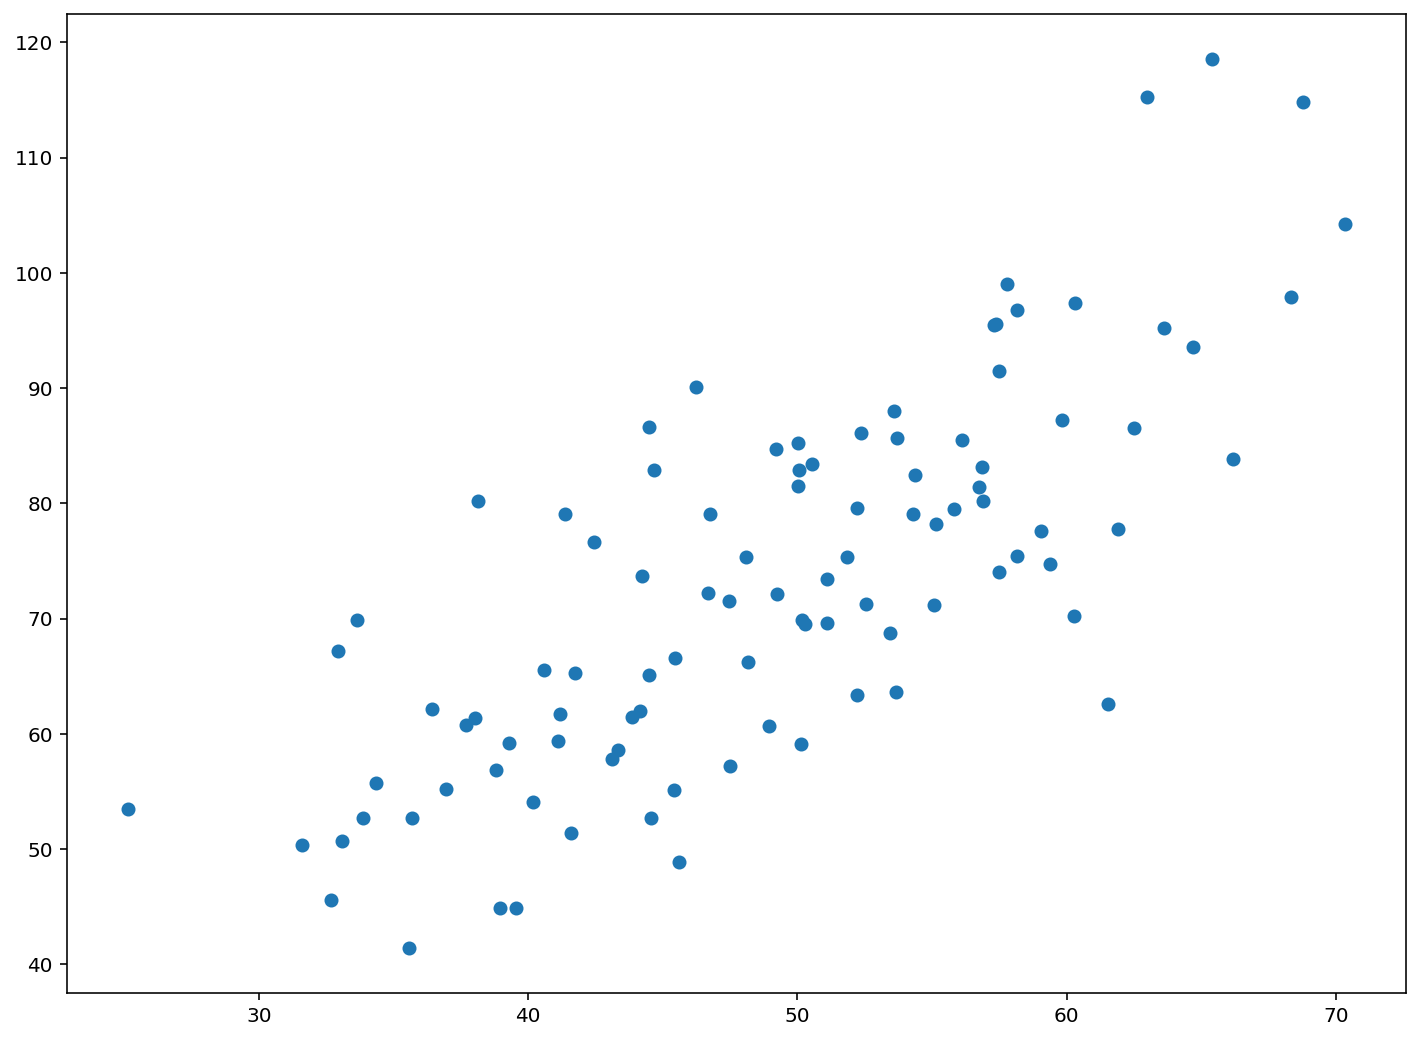

In [2]:
# Plotting the Data
# Plotting the data
plt.rcParams['figure.figsize'] = (12.0,9.0)

data = pd.read_csv('data.csv')
X = data.iloc[:,0]
Y = data.iloc[:,1]
plt.scatter(X,Y)
plt.show()

In [3]:
# Building the model
X_mean = np.mean(X)
Y_mean = np.mean(Y)

num = 0
den = 0
for i in range(len(X)):
    num += (X[i] - X_mean)*(Y[i] - Y_mean)
    den += (X[i] - X_mean)**2
m = num / den
c = Y_mean - m*X_mean

print (m, c)

1.287357370010931 9.908606190326509


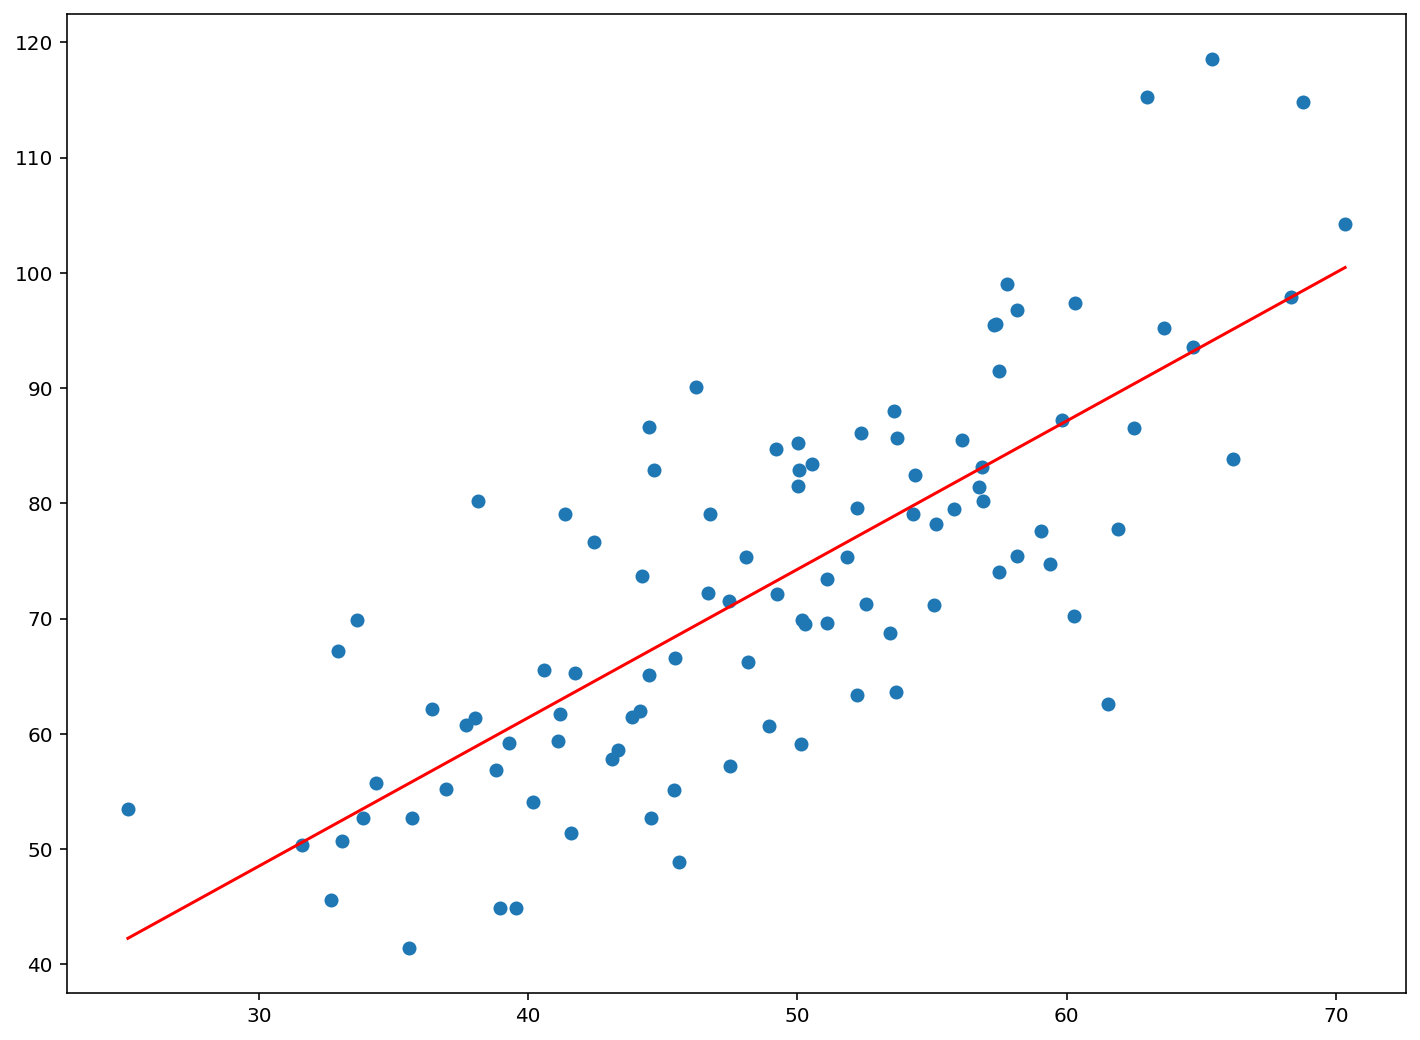

In [4]:
# Making predictions
Y_pred = m*X + c

plt.scatter(X, Y) # actual
plt.plot([min(X), max(X)], [min(Y_pred), max(Y_pred)], color='red') # predicted
plt.show()

---

# 4. Conclusions


In this chapter you discovered the simple linear regression model and how to train it using least squares. You learned:

- How to work through the application of the least squares.

- How to make predictions using a learned linear regression model.

You now know how to implement linear regression using Least Squares.